# **Ridge Regresyon Modeli**



*   Aşırı öğrenmeye dirençli
*   Yanlıdır fakat varyansı düşüktür (Bazen yanlı modeller daha çok tercih edilir)


*   Çok fazla parametre olduğu için EKK'ya göre daha iyidir
*   Çok boyutluluk lanetine karşı çözüm sunar (Çok boyutluluk: değişken sayısının gözlem sayısından fazla olması durumudur)

*   Çoklu doğrusal bağlantı problemine karşı etkilidir.(Çoklu doğrusal bağlantı problemi: bağımsız değişkenler arasında yüksek korelasyon olması durumudur)


*   Tüm değişkenler ile model kurar, ilgisiz değişkenleri modelden çıkartmaz. Katsayılarını sıfıra yaklaştırır.
*   Lambda kritik ögedir. formüldeki iki terimini etkilerini kontrol etme imkanı sağlar. Lambda ayar parametremizdir.


*   Lamba için iyi bir değer bulunması önemlidir bunun için cv yöntemi uygulanır.











**Burada amaç hata kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmaktır.**

*   Lambda'nın sıfır olduğu zamanda model EKK'dır (klasik regresyon).

*   Lambda için belirli bir değer içeren küme seçilir ve her birisi için cross validation test hatası hesaplanır.

*   En küçük cross validation'u verem lamba ayar parametresi olarak seçilir.

*   Seçilen lambda ile model yeniden tüm gözlemlere fit edilir.


# **Gerekli Kütüphaneler**

In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

# **Veri Seti**

In [3]:
df = pd.read_csv('/content/Hitters.csv')


In [4]:
df=df.dropna() #İçerisindeki boş değerleri kaldırdık

In [5]:
dms= pd.get_dummies(df[['League','Division','NewLeague']]) #Kategorik değişkenleri dummie değişkene çevirdik. (One-hot encoding)

In [6]:
y = df['Salary']
x_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #Kategorik ve bağımlı değişkenleri atıyoruz ve bağımsız değişkenleri elde ediyoruz
x = pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1) #Oluşturduğumuz dummieler ile bağımsız değişkenlerimizi bir araya getiriyoruz.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

Veri seti: Baseball oyuncularına ait bir veri setidir. Bu veri setinde oyunculara ilişkin maaşları, attıkları sayı, oynadıkları lig gibi bilgiler yer almaktadır.

In [8]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [9]:
df.shape

(263, 20)

**Bu veri setinde amacımız salary değerini diğer değişkenleri kullanarak tahmin etmeye çalışmak olacaktır.**


# *Bu kısımda veri manipülasyonui, keşifçi veri analizi yapılması gerekmektedir.*

# **Ridge Fonksiyonu**

In [10]:
ridge_model = Ridge(alpha=0.1).fit(x_train,y_train)

In [13]:
ridge_model

Ridge(alpha=0.1)

In [14]:
ridge_model.coef_ #Alpha 1 olduğundaki katsayı değerleri

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [15]:
ridge_model.intercept_ #Alpha 1 olduğundaki sabit değer

-4.578626905723354

In [16]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 #Lambda değerleri #linspace rastgele sayılar çekmek için kullanılıyordu.

In [17]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [18]:
Ridge_model= Ridge()
Katsayılar = []

for i in lambdalar:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(x_train,y_train)
  Katsayılar.append(ridge_model.coef_)


In [19]:
Katsayılar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

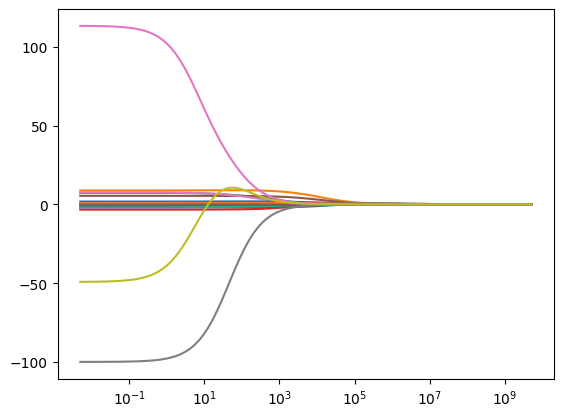

In [20]:
ax = plt.gca()

ax.plot(lambdalar, Katsayılar) #her bir lambda değerine karşılık gelecek şekilde katsayılar nasıl oluşmuştur.
ax.set_xscale('log')

Bu grafiğe göre lambdalar yani değerler arttıkça değerleri sıfıra doğru yaklaştırmış. Burada amaç optimum lambda değerini bularak değerlerin en anlamlı hangi lambdada olduğuu bulmaktır.

# **Tahmin**

In [24]:
ridge_model = Ridge().fit(x_train,y_train)

In [25]:
y_pred = ridge_model.predict(x_train)

In [27]:
y_pred [0:10] #tahmin edilen değerler

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [29]:
y_train [0:10] #Gerçek değerler

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

Elimizde hem train hatası hem test hatası olacak. Train hatası test hatasının kötü bir tahmincisidir

***Train Hatası***

In [30]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

289.34470696006565

In [35]:
np.sqrt(np.mean(-cross_val_score(ridge_model,x_train,y_train,cv=10,scoring='neg_mean_squared_error')))

351.3931585606325

***Test Hatası***

In [36]:
y_pred= ridge_model.predict(x_test)

In [37]:
RMSE= np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.80829057302424

# **Model Tuning**

In [38]:
ridge_model = Ridge().fit(x_train,y_train)
y_pred = ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.80829057302424

In [39]:
np.random.randint(0,100,10)

array([13, 66, 10, 82, 69,  1, 62, 67,  9, 20])

In [40]:
lamdalar1 = np.random.randint(0,100,100)

In [41]:
lamdalar2= 10**np.linspace(10,-2,100)*0.5

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


ridgecv = RidgeCV(alphas=lamdalar2, scoring='neg_mean_squared_error', cv=10)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [51]:
ridgecv.alpha_

1526927.7544167063

Final Modeli

In [52]:
Ridge_Tuned= Ridge(alpha=ridgecv.alpha_).fit(x_train,y_train)

In [53]:
y_pred = Ridge_Tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

385.8643856146936